In [30]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.dates as mdates;
import matplotlib.ticker as ticker;

# %matplotlib inline: only draw static
# images in the notebook
#%matplotlib inline

# Chapter 1

In [52]:
tablets = pd.read_csv('./tablets.csv')
tablets.head()

,Tablet,Cost ($),Operating System,Display Size (centimeters),Battery Life (hours),CPU Manufacturer
0,Acer Iconia W510,599,Windows,25.7,8.5,Intel
1,Amazon Kindle Fire HD,299,Android,22.6,9.0,TI OMAP
2,Apple iPad 4,499,iOS,24.6,11.0,Apple
3,HP Envy X2,860,Windows,29.5,8.0,Intel
4,Lenovo ThinkPad Tablet,668,Windows,25.7,10.5,Intel


## 2

**2.a-b**

In [ ]:
tablets.shape
#tablets.columns.size

(10, 6)

**2.c**

In [ ]:
tablets.info()

# 2 Categorical
# 3 Quantative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tablet                      10 non-null     object 
 1   Cost ($)                    10 non-null     int64  
 2   Operating System            10 non-null     object 
 3   Display Size (centimeters)  10 non-null     float64
 4   Battery Life (hours)        10 non-null     float64
 5   CPU Manufacturer            10 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 608.0+ bytes


**2.d**

- Tablet, OS, CPU Mani: nominal scale

- Cost, Display, Batter: ratio scale


## 3

**3.a**

In [ ]:
# np.mean(tablets['Cost ($)'])
np.sum(tablets['Cost ($)']) / tablets['Cost ($)']

0     9.731219
1    19.494983
2    11.681363
3     6.777907
4     8.726048
5     6.483871
6    10.998113
7     9.879661
8    11.102857
9    16.191667
Name: Cost ($), dtype: float64

**3.b**

In [ ]:
winOS  = tablets['Operating System'] == "Windows"
adrOS = tablets['Operating System']  == 'Android'

winSum = np.sum(tablets[winOS]['Cost ($)'])
adrSum = np.sum(tablets.loc[adrOS, 'Cost ($)'])

avgWin = winSum / len(tablets.loc[winOS])
avgAdr = adrSum / len(tablets.loc[adrOS])

print(avgWin)
print(avgAdr)

723.2
428.5


**3.c**

In [ ]:
cpu = tablets['CPU Manufacturer'] == 'TI OMAP'
( len(tablets.loc[cpu]) / len(tablets) ) * 100

20.0

**3.d**

In [ ]:
( len(tablets.loc[adrOS]) / len(tablets) ) * 100

40.0

In [ ]:
phones = pd.read_csv('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/phones.csv')
phones.head()


,Brand,Model,Price ($),Overall Score,Voice Quality,Talk Time (hours)
0,AT&T,CL84100,60,73,Excellent,7
1,AT&T,TL92271,80,70,Very Good,7
2,Panasonic,4773B,100,78,Very Good,13
3,Panasonic,6592T,70,72,Very Good,13
4,Uniden,D2997,45,70,Very Good,10


In [ ]:
phones = phones.rename(str.strip, axis='columns')

for col in phones.columns:
  #is_col_object_dtype = is_object_dtype(df[column])
  if phones[col].dtype == object:
    phones[col] = phones[col].str.strip()

## 4

**4.a**

In [ ]:
phones.shape

(8, 6)

**4.b**
- Price, Overall Score, Talk Time: Quantative
- Voice Quality: Categorical

**4.c**
- Model: Nominal
- Voice Quality: Ordinal
- Price, Talk Time: Ratio
- Overall Score: Interval

## 5

**5.a**

In [ ]:
np.average(phones['Price ($)'])

68.125

**5.b**

In [ ]:
np.average(phones['Talk Time (hours)'])

8.875

**5.c**

In [ ]:
condition = phones['Voice Quality'] == 'Excellent'
result = phones.loc[condition, 'Voice Quality']
(result.size / len(phones['Voice Quality'])) * 100

25.0

## **6**
- Categorical
- Ratio Quantative
- Categorical Ordinal
- Ration Quantative
- Categorical Ordinal

## **7**
- Categorical
- Nominal

## **8**
- 762
- Categorical
- Yes
- 762*0.67 = 511

## **9**
- Categorical
- 23+18+30= 71 -> 71/30 -> 42%

## **10**

- Categorical
- Yes
- 44+130+165+741 = 1080 -> 44/1080 * 100 = 4%
- Against

## 11

295 -> for/
672 -> against/
51 -> no opinion

- Categorical
- 1018
- 295/1080 = 27%
- Against

## 12
- Huawaii Vistors
- Yes
- Quantative, Categorical, Categorical, Quantative

## 13
- Revenue
- Quantative
- Time Series
- For 10 years the revenue increased by 60%

## 14

### 14.a

In [ ]:
data = [(327, 167, 204),
        (311, 140, 220),
        (286, 106, 300),
        (290, 108, 270)]
years = ['2007', '2008', '2009', '2010']
companies = pd.DataFrame(data, columns=['Hertz', 'Dollar', 'Avis'], index=years)

companies.head()

,Hertz,Dollar,Avis
2007,327,167,204
2008,311,140,220
2009,286,106,300
2010,290,108,270


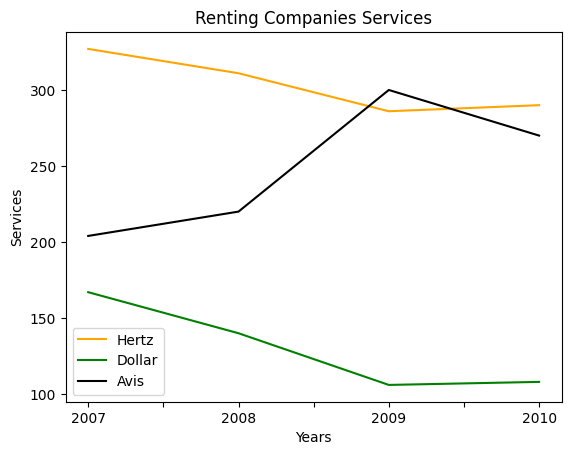

In [ ]:
plt.xlabel('Years')
plt.ylabel('Services')

companies['Hertz'].plot(label='Hertz', color='orange')
companies['Dollar'].plot(label='Dollar', color='green')
companies['Avis'].plot(label='Avis', color='black')

plt.title('Renting Companies Services')
plt.legend()

### 14.b-d
- Hertz
- It shows to be dropping in between 2007 and 2009 for Hertz and Dollar whereas Avis is steadly growing, then stable from 2009 to 2010 but dropping for Avis
- Cross-sectional

<Axes: >

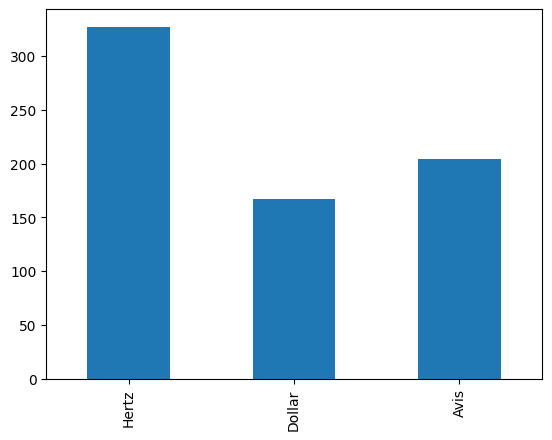

In [ ]:
cmps = ['Hertz', 'Dollar', 'Avis']
companies.loc['2007'].plot.bar()

## 15
- Quantative
- Time Series
- July (1100)
- 61/4730 * 100 = 1% --- 76/4730 * 100 = 2% (yes resonable because of the off season)
- The accidents are high in general, specially during summer

## 16

### 16.a

In [ ]:
gas = pd.read_excel('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/EMM_EPMRU_PTE_NUS_DPGm.xls', sheet_name='Data 1'
                    , skiprows=2)
gas.rename(columns={gas.columns[1] :' Dollars per Gallon'},
           inplace=True)
gas.head()

,Date,Dollars per Gallon
0,1990-08-15,NaN
1,1990-09-15,1.258
2,1990-10-15,1.335
3,1990-11-15,1.324
4,1990-12-15,NaN


<Axes: xlabel='Date', ylabel='Average Price Per Gallon'>

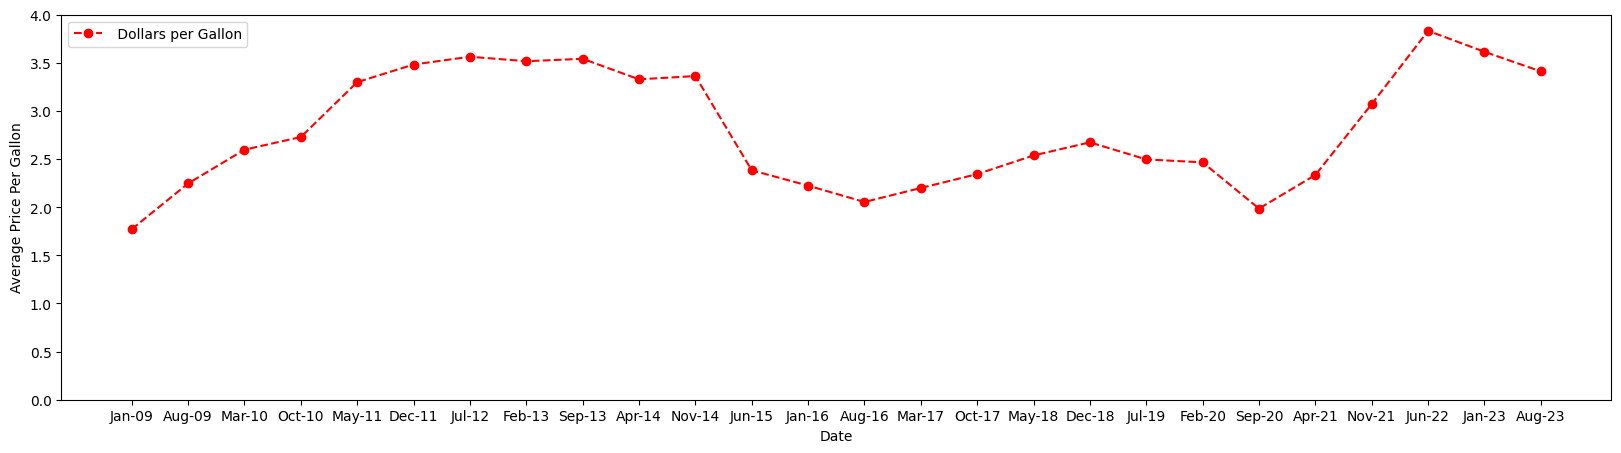

In [ ]:
#modified answer (I thought the plot is grouped by every 7 months)
filterGas = gas.loc[gas['Date'].dt.year >= 2009].copy()
grouped = filterGas.groupby(pd.Grouper(key='Date', freq='7M')).mean()
grouped.index = grouped.index.strftime('%b-%y')
grouped.plot(xticks=range(0, len(grouped.index)),figsize=(20, 5), ylim=(0, 4), ylabel="Average Price Per Gallon"
             , style="--ro")

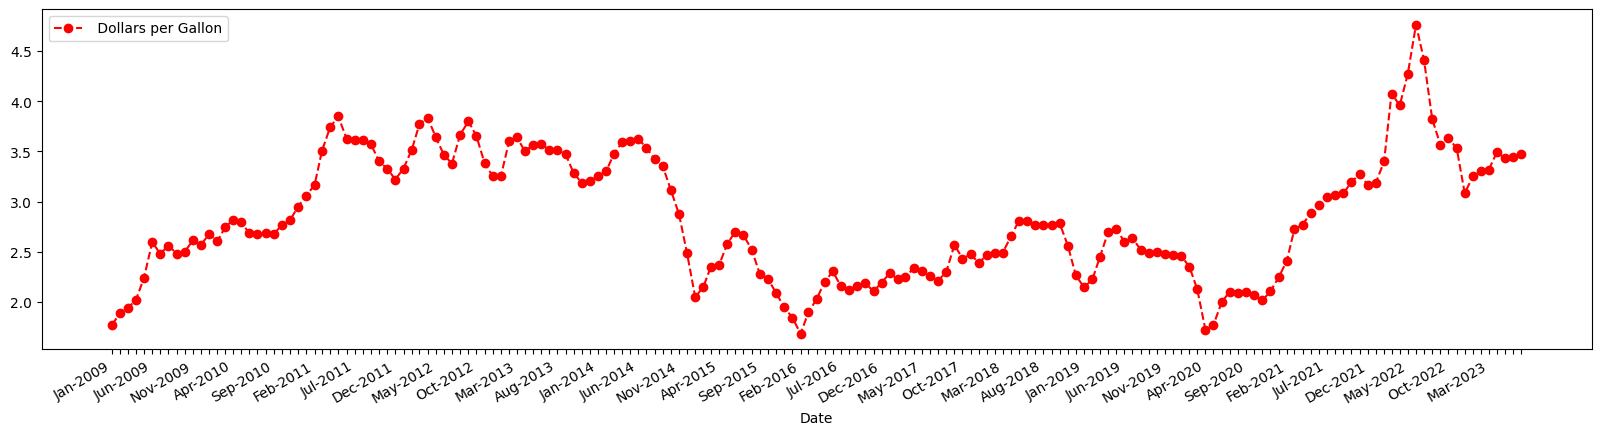

In [ ]:
ax = filterGas.plot(x='Date', figsize=(20, 5), xticks=filterGas['Date'], style="--ro")
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


### 16.b-c
- The price dropped from 2014 average price to get the same price on 2021 then got higher and reached its highest price in 2022
- not  always

## 17
- Internal Resources: company average salaries, the subordinate deparment's average salaries.
- External Resources: Subordinate's job avg salaries in their city.

## 18
- 684/1021 = 66%
- 1021 * 0.60 = 613
- Categorical

## 19
- North American Bloomberg Businessweek Subscribers
- Quantative
- Categorical
- Cross-Sectional
- North American have high incomes and we could target them by more ads or projects!

## 20
- Most managers don't have enough info on stock market. 
  Few consider the health sector to be the leading market for the next 12 months.
- 11.2%
- 2.5 year

## 21
- Women's mothers who took/don't took DES during pregnancy.
- Survey
- 3980 -> 63 === 1980/4 -> 63/4 = 16
- 
- Because the issue concerns people health and they need to be ascertain 

## 22
- A sample from our Denver clients selling their homes.
- Surveying them about their resaons for moving, Where are they wishing to move, Facilities they are looking for.

## 23
- American adults
- Cell phones and tablets owners
- Sample survey, 
- Yes interesting, based on this info I can make sure my data is available online and updated

## 24
- Correct
- Generalized
- Correct
- Generalized
- Generalized

## 25

In [ ]:
shadow = pd.read_excel('/home/zenbaei/Documents/Data_Statstics_Solutions_Notebooks/Shadow_Stocks.xls')
shadow['Exchange'] = shadow['Exchange'].str.strip()
shadow.head()

,Company,Exchange,Ticker Symbol,Market Cap in millions,Price by Earnings Ratio,Profit Margin Percentage
0,DeWolfe Companies,AMEX,DWL,36.4,8.4,36.7
1,North Coast Energy,OTC,NCEB,52.5,6.2,59.3
2,Hansen Natural Corp.,OTC,HANS,41.1,14.6,44.8
3,"MarineMax, Inc.",NYSE,HZO,111.5,7.2,23.8
4,Nanometrics Incorporated,OTC,NANO,228.6,38.0,53.3


### 25.a-d
- 5
- Exchange - Ticker symbol are Categorical. Market - Price - Profit are Quantative

In [ ]:
amex = len(shadow[shadow['Exchange'] == 'AMEX'])
nyse = len(shadow[shadow['Exchange'] == 'NYSE'])
otc = len(shadow[shadow['Exchange'] == 'OTC'])

In [ ]:
(len(shadow[shadow['Exchange'] == 'AMEX']) / len(shadow) ) * 100

20.0

In [ ]:
exchange = pd.DataFrame([('AMEX', amex), ('NYSE', nyse), ('OTC', otc)], columns=['Name', 'Freq'])
exchange = exchange.set_index('Name')
exchange.head()

,Freq
Name,
AMEX,5
NYSE,3
OTC,17


<Axes: xlabel='Name'>

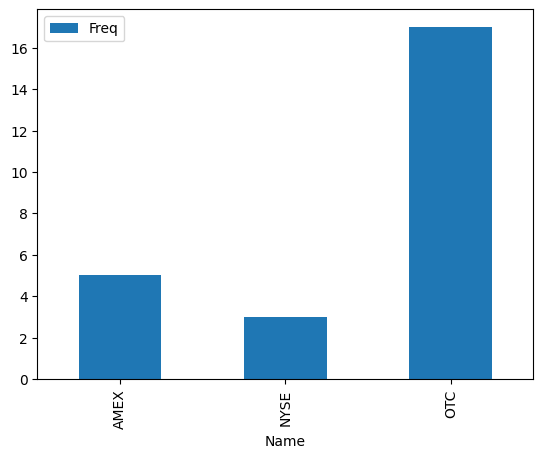

In [ ]:
exchange.plot(kind='bar')

<Axes: xlabel='Profit Margin Percentage'>

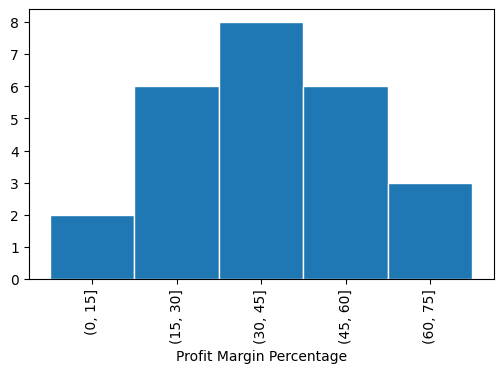

In [ ]:
bins = np.arange(0, 80, 15)
#ax = pd.cut(shadow['Profit Margin Percentage'], bins= bins).value_counts().sort_index()
#plt.bar(x=shadow['Profit Margin Percentage'])  

fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.cut(shadow['Profit Margin Percentage'], bins= bins)
        .value_counts()
        .sort_index()
        .plot.bar(ax=ax, width=1, edgecolor='w')
)




In [ ]:
np.average(shadow['Price by Earnings Ratio '])

20.215999999999998

# Chapter 2

### 1

In [ ]:
abc = pd.DataFrame([('A', 60), ('B', 24), ('C', 36)], columns=['Category', 'Freq'])
abc = abc.set_index('Category')
abc.head()

,Freq
Category,
A,60
B,24
C,36


In [ ]:
abc_rlt = abc['Freq']/120
abc_rlt.head()

Category
A    0.5
B    0.2
C    0.3
Name: Freq, dtype: float64

## 2

In [ ]:
abcd = pd.DataFrame([{'A': .22, 'B': .18, 'C': .40}])
abcd.head()

,A,B,C
0,0.22,0.18,0.4


### 2.a

In [ ]:
d = 1- (abcd['A'] + abcd['B'] + abcd['C'])
d

0    0.2
dtype: float64

### 2.b

In [ ]:
d = d*200
d

0    40.0
dtype: float64

### 2.c

In [ ]:
A = abcd['A'] * 200
B = abcd['B'] * 200
C = abcd['C'] * 200

abcd_freq = pd.DataFrame({'A': A, 'B': B, 'C': C, 'D': d})

abcd_freq.head()


,A,B,C,D
0,44.0,36.0,80.0,40.0


### 2.d

In [ ]:
abcd_pf = (abcd_freq / 200) * 100
abcd_pf.head()

,A,B,C,D
0,22.0,18.0,40.0,20.0


## 3

In [ ]:
qst = pd.DataFrame([{'Yes': 58, 'No': 42, 'no-opinion': 20}])
qst.head()

,Yes,No,no-opinion
0,58,42,20


### 3.a

In [ ]:
360 * (qst['Yes'] / qst.iloc[0].sum())

0    174.0
Name: Yes, dtype: float64

### 3.b

In [ ]:
360 * (qst['No'] / qst.iloc[0].sum())

0    126.0
Name: No, dtype: float64

### 3.c

<Axes: ylabel='0'>

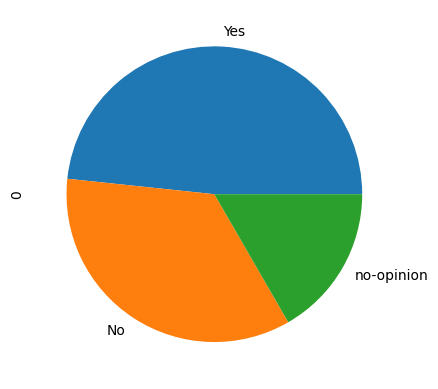

In [ ]:
qst.iloc[0].plot(kind='pie')

### 3.d

<Axes: >

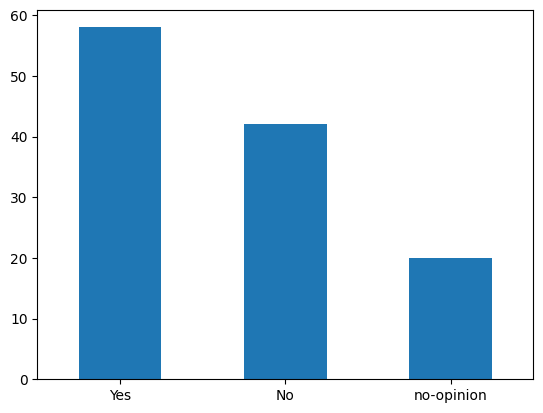

In [ ]:
qst.iloc[0].plot(kind='bar', rot= 0)

## 4

In [ ]:
synd_prog = pd.read_csv('syndicated_programs.csv', header=None, names=['show'])
synd_prog['show'] = synd_prog['show'].str.upper()
synd_prog.head()

,show
0,WOF
1,THM
2,JEP
3,WOF
4,THM


### 4.a

In [ ]:
#synd_prog_frq = synd_prog.value_counts().to_frame()
synd_prog_frq = synd_prog.value_counts().rename_axis('show').reset_index(name='counts')
synd_prog_frq

,show,counts
0,WOF,13
1,THM,12
2,JEP,10
3,JJ,8
4,OWS,7


In [ ]:
synd_prog_prc_frq = synd_prog_frq.copy()
synd_prog_prc_frq['counts'] = (synd_prog_prc_frq['counts'] / synd_prog.size) * 100
synd_prog_prc_frq


,show,counts
0,WOF,26.0
1,THM,24.0
2,JEP,20.0
3,JJ,16.0
4,OWS,14.0


### 4.c

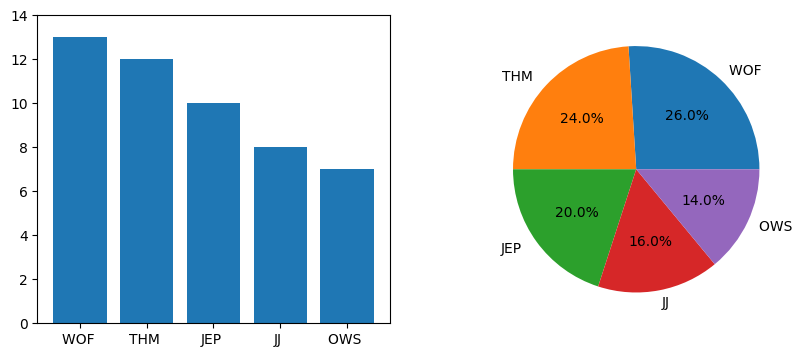

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize= (10, 4))
axs[0].set_ylim(0, 14)
axs[0].bar(synd_prog_frq['show'], synd_prog_frq['counts'])
axs[1].pie(synd_prog_frq['counts'], labels=synd_prog_frq['show'], autopct='%1.1f%%')
plt.show()

## 11

In [ ]:
import pandas as pd;
import numpy as np;

freq_dist = pd.read_csv('freq-dist-classes.csv', header=None)
freq_dist.head()

,0,1,2,3,4
0,14,21,23,21,16
1,19,22,25,16,16
2,24,24,25,19,16
3,19,18,19,21,12
4,16,17,18,23,25


In [ ]:
freq_dist_stk = freq_dist.stack()
freq_dist_stk.head(10)

0  0    14
   1    21
   2    23
   3    21
   4    16
1  0    19
   1    22
   2    25
   3    16
   4    16
dtype: int64

In [ ]:
freq_dist_stk.reset_index(drop=True, inplace=True)
freq_dist_stk

0     14
1     21
2     23
3     21
4     16
5     19
6     22
7     25
8     16
9     16
10    24
11    24
12    25
13    19
14    16
15    19
16    18
17    19
18    21
19    12
20    16
21    17
22    18
23    23
24    25
25    20
26    23
27    16
28    20
29    19
30    24
31    26
32    15
33    22
34    24
35    20
36    22
37    24
38    22
39    20
dtype: int64

In [ ]:
freq_dist_stk.value_counts().sort_index()

12    1
14    1
15    1
16    6
17    1
18    2
19    5
20    4
21    3
22    4
23    3
24    5
25    3
26    1
Name: count, dtype: int64

### 11.a

In [ ]:
df = freq_dist_stk.to_frame()
output = pd.cut(freq_dist_stk, bins = np.arange(12, 28, 3), include_lowest=True, precision=0).value_counts().sort_index()
output

(11, 15]     3
(15, 18]     9
(18, 21]    12
(21, 24]    12
(24, 27]     4
Name: count, dtype: int64

### 11.b

In [ ]:
df = pd.DataFrame(output)
df.rename(columns={'count': 'freq'}, inplace=True)
df

,freq
"(11, 15]",3
"(15, 18]",9
"(18, 21]",12
"(21, 24]",12
"(24, 27]",4


In [ ]:
df['relative'] = df['freq'] / freq_dist_stk.size
df

,freq,relative
"(11, 15]",3,0.075
"(15, 18]",9,0.225
"(18, 21]",12,0.300
"(21, 24]",12,0.300
"(24, 27]",4,0.100


In [ ]:
df['percent'] = df['relative'] * 100
df

,freq,relative,percent
"(11, 15]",3,0.075,7.5
"(15, 18]",9,0.225,22.5
"(18, 21]",12,0.300,30.0
"(21, 24]",12,0.300,30.0
"(24, 27]",4,0.100,10.0


## 12

In [ ]:
freq_dist_12 = pd.read_csv('freq_dist_12.csv')
freq_dist_12['Cumulative_Frq'] = 0
freq_dist_12

,Class,Frequency,Cumulative_Frq
0,10–19,10,0
1,20–29,14,0
2,30–39,17,0
3,40–49,7,0
4,50–59,2,0


In [ ]:
total = 0;
for idx, row in freq_dist_12.iterrows():
    total = total + freq_dist_12.iloc[idx, 1]
    freq_dist_12.iloc[idx, 2] = total
freq_dist_12

,Class,Frequency,Cumulative_Frq
0,10–19,10,10
1,20–29,14,24
2,30–39,17,41
3,40–49,7,48
4,50–59,2,50


In [ ]:
n = freq_dist_12['Frequency '].sum()
freq_dist_12['Relavtive_Cum_Frq'] = freq_dist_12['Cumulative_Frq'] / n
freq_dist_12

,Class,Frequency,Cumulative_Frq,Relavtive_Cum_Frq
0,10–19,10,10,0.20
1,20–29,14,24,0.48
2,30–39,17,41,0.82
3,40–49,7,48,0.96
4,50–59,2,50,1.00


## 13

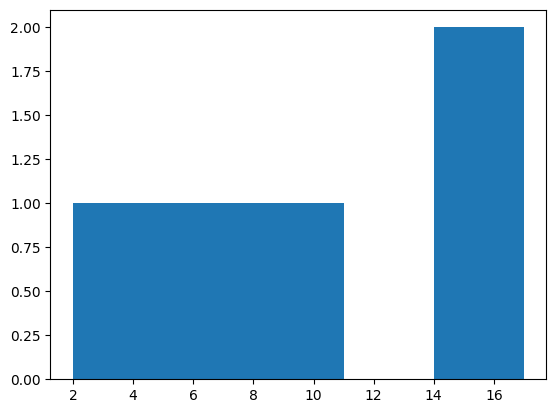

In [ ]:
import matplotlib.pyplot as plt;

fig, ax = plt.subplots()
ax = plt.hist(freq_dist_12['Frequency '], bins = 5)
plt.show()

## Plecian Store Case

In [44]:
import pandas as pd;
import matplotlib.pyplot as plt;

pelicansStore = pd.read_csv("./PelicanStores.csv")
## drop columns by index
pelicansStore.drop(pelicansStore.iloc[:, 8 : 13], inplace=True, axis=1)
pelicansStore.head()

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
0,1,Regular,1,39.5,Discover,Male,Married,32
1,2,Promotional,1,102.4,Proprietary Card,Female,Married,36
2,3,Regular,1,22.5,Proprietary Card,Female,Married,32
3,4,Promotional,5,100.4,Proprietary Card,Female,Married,28
4,5,Regular,2,54.0,MasterCard,Female,Married,34


In [24]:
## Promotional customer numbers during the promotion had a higher sales comparing to regular customers
## Rename groupby columns
typeOfCustomers = pelicansStore.groupby(['Type of Customer'])["Net Sales"].agg(["sum", "count"]).rename(columns={'sum': 'Net Sales'})
## Refrencing dataframe column from within apply
typeOfCustomers['Sales Percentage'] = typeOfCustomers.apply(lambda x : (x['Net Sales'] / pelicansStore['Net Sales'].sum()) * 100, axis = 'columns')
typeOfCustomers

,Net Sales,count,Sales Percentage
Type of Customer,,,
Promotional,5900.30,70,76.034304
Regular,1859.75,30,23.965696


In [107]:
## select by condition, there is also numpy where func
promoCust = pelicansStore[pelicansStore['Type of Customer'] == 'Promotional']
promoCust.groupby(['Method of Payment'])["Customer"].count().apply(lambda x : (x / len(promoCust)) * 100)
## I wanted to count non Property Card Method of Payment by checking them, but they say no way to access Series index within apply(), so promote it to column

## By Looking at the number of promotinal customers, the ones with Propreitary Card (Customers of other National Clothes) 
# got attracted to the promotion and had the higher of purchase number with 81%

Method of Payment
American Express     1.428571
MasterCard          10.000000
Proprietary Card    81.428571
Visa                 7.142857
Name: Customer, dtype: float64

<Axes: ylabel='Net Sales'>

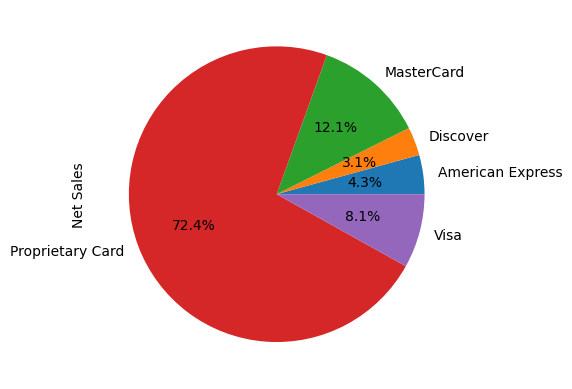

In [48]:
pelicansStore.groupby(['Method of Payment'])['Net Sales'].sum().plot.pie(autopct="%.1f%%") ## autopct takes string format. .1 means one decimal flot and show percentage with %% one for escape

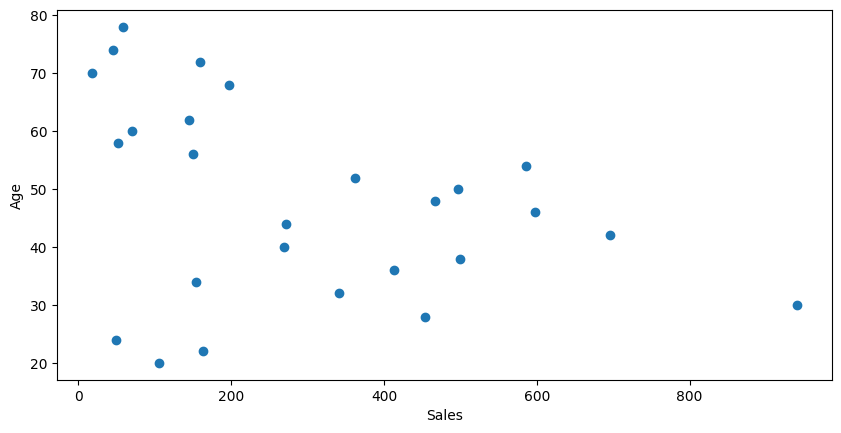

In [47]:
salesByAge = pelicansStore.groupby(['Age'])['Net Sales'].sum().to_frame()

## use index for plotting, this doesn't work
# salesByAge.plot.scatter(x= salesByAge['Net Sales'], y = salesByAge.index)
plt.figure().set_figwidth(10)
plt.scatter(salesByAge['Net Sales'], salesByAge.index)
plt.xlabel('Sales');
plt.ylabel('Age')
plt.show()

## The average sales price are brought by the age category of 30 to 50, as people get older they tend to buy cheaper cloth